# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.





**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов
* Задача 2 &mdash; 30 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 60 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture4.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим двухслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

...

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = \; ...$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = \; ...$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = \; ...$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = \; ...$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \; ...$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \; ...$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \; ...$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial ...} \frac{\partial ...}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Всё на листике


**Вывод:**
с помощью метода обратного распространения можно легко найти все необходимые нам производные ведь градиенты легко считаются друг через друга и соответственно задача уничтожается на раз-два \\
мы сумели разработать хороший алгоритм для обновления параметров при немалой выборке (считать градиент лишь в одной случайно выбранной точке)
будем использовать это в будущем!)


---
### Задача 2.

Напишите нейронную сеть из задачи 1 с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

Генерация данных: \\
Мы генерируем данные, используя стандартное нормальное распределение для переменной X.
Затем мы вычисляем переменную y согласно нелинейной функции y = x/sqrt(1+x^2)
Далее мы преобразуем данные в тензоры PyTorch и убеждаемся, что форма тензора
y соответствует ожидаемой форме \\
Для нелинейной функции я решил взять сигмоиду чтобы обучение модели и полученные результаты были более наглядные (позже обьясню еще раз)

In [ ]:
def build_sigmoid(X):
  return (X/(1+X**2)**(1/2))

In [ ]:
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = (build_sigmoid(X)).reshape(-1)
assert y.shape == (sample_size,)


Разделение данных на обучающую и тестовую выборки:

Мы используем функцию train_test_split из библиотеки scikit-learn для разделения данных на обучающую и тестовую выборки.
Доля тестовой выборки установлена в 20%.
Выводятся размеры обучающих и тестовых данных.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(800000, 1) (200000, 1) (800000,) (200000,)


In [ ]:
x_torch_train = torch.FloatTensor(X_train)
y_torch_train = torch.FloatTensor(y_train)
x_torch_train = x_torch_train.reshape(-1, 1)
y_torch_train = y_torch_train.reshape(-1, 1)
print(x_torch_train.shape, y_torch_train.shape)

torch.Size([800000, 1]) torch.Size([800000, 1])


Определение нейросети:

Мы создаем нейросеть в стиле Sequential с использованием библиотеки PyTorch.
Сеть состоит из трех слоев: входного слоя с одним признаком, слоя с сигмоидной функцией активации и выходного слоя с одним признаком.
Используется функция активации Sigmoid.

In [ ]:
  # собираем модули в последовательность
model = nn.Sequential(
    # кол-во признаков во входном слое 1, в выходном тоже 2
    nn.Linear(in_features=1, out_features=2),
    # функция активации - сигмоида
    nn.Sigmoid(),
    # кол-во признаков во входном слое 2, в выходном тоже 1
    nn.Linear(in_features=2, out_features=1)
)

model

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)

Инициализация параметров модели:

Мы инициализируем параметры модели, устанавливая их значения в 1.

In [ ]:
for p in model.parameters():
    p.data = torch.FloatTensor([[1]])
    print(p.data)

tensor([[1.]])
tensor([[1.]])
tensor([[1.]])
tensor([[1.]])


Обучите нейросеть на этих данных. Используйте код с занятия.

Написали функцию для визуализации процесса обучения нейросети

In [ ]:
def show_progress(x, y, y_pred, loss):
    '''
    Визуализация процесса обучения.

    x, y -- объекты и таргеты обучающей выборки;
    y_pred -- предсказания модели;
    loss -- текущее значение ошибки модели.
    '''

    # Открепим переменную от вычислительного графа перед отрисовкой графика
    y_pred = y_pred.detach()

    # Стираем предыдущий вывод в тот момент, когда появится следующий

    # Строим новый график
    plt.figure(figsize=(10, 7))
    plt.scatter(x, y, alpha=0.75, label='Реальные значения')
    plt.scatter(x, y_pred, color='orange', alpha=0.75, label='Предсказанные значения')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Апроксимация функции')
    plt.legend()
    plt.show()

    print(f"MSE = {loss:.3f}")


Мы используем оптимизатор SGD с шагом обучения 0.01 и среднеквадратичной ошибкой в качестве функции потерь.
Затем мы визуализируем процесс обучения с использованием функции show_progress.
Обучение происходит в цикле с 60 000 итераций, при этом параметры модели обновляются методом стохастического градиентного спуска.
Обучение останавливается, если значение ошибки уменьшается до 0.005.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
optim_func = nn.MSELoss()
num_iter = 60000
iteration = 0

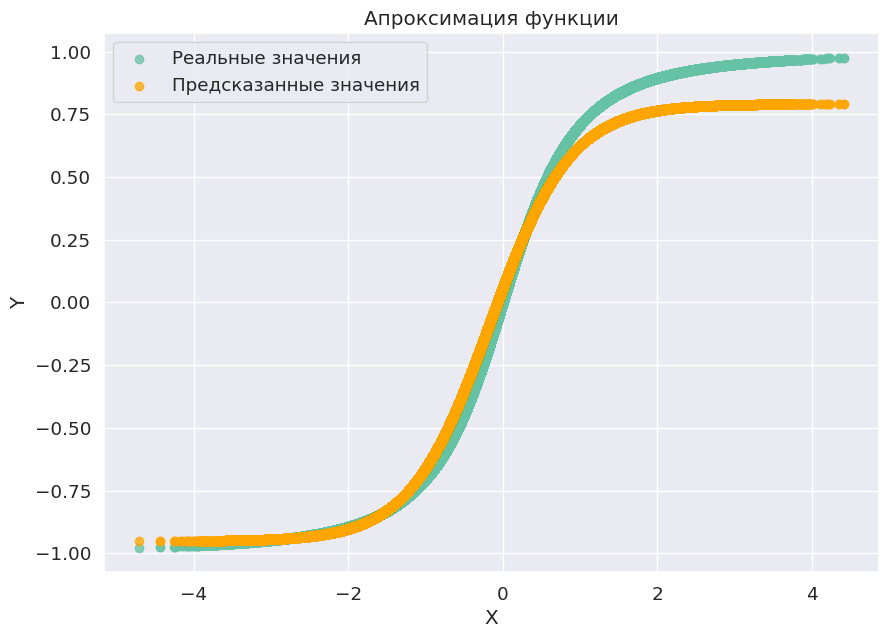

MSE = 0.005
Обучение завершено на итерации 1660


In [ ]:
for i in range(num_iter):
    iteration += 1
    y_pred = model(x_torch_train)
    loss = optim_func(y_pred, y_torch_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if (i + 1) % 5 == 0:
        if loss.item() <= 0.005:
            show_progress(x_torch_train, y_torch_train, y_pred.detach(), loss.item())
            print("Обучение завершено на итерации", iteration)
            break

видно, что графики почти совпадают, что следует из того, что обе функции (исходная и наша апроксимирующая) имеют сигмоидальный тип. оценка MSE 0.005 этому соответствует

Визуализируйте предсказания и посчитайте MSE на тестовой части данных.

Мы используем обученную модель для предсказания на тестовой выборке.
Затем вычисляем среднеквадратичную ошибку (MSE) на тестовой части данных и выводим результат.

MSE = 0.005


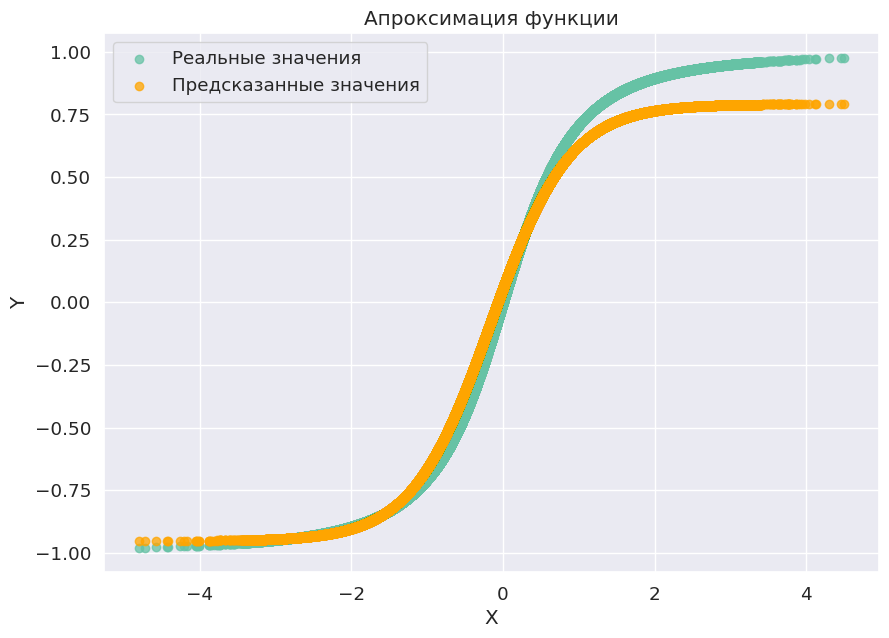

MSE = 0.005


In [ ]:
x_torch_test = torch.FloatTensor(X_test)
y_torch_test = torch.FloatTensor(y_test)
x_torch_test = x_torch_test.reshape(-1, 1)
y_torch_test = y_torch_test.reshape(-1, 1)
y_pred = model(x_torch_test)
loss = optim_func(y_pred, y_torch_test)
print(f"MSE = {loss:.3f}")
show_progress(x_torch_test, y_torch_test, y_pred, loss)

получили отклонение 0.005 на тестовой выборке. Она совпадает с отклонением на обучающей модели. Отсюда можно сделать вывод о том, что распределение данных из тестовой и обучающей выборок равномерно в исходном массиве. По графику видно, что нейросеть обучилась достаточно хорошо. Его структура совпадает со структурой графика из обучения

В данной задаче была построена нейронная сеть с использованием библиотеки PyTorch в Sequential-стиле для аппроксимации нелинейной функции. Процесс обучения визуализирован, и достигнута остановка обучения по критерию MSE. Полученная модель использована для предсказания на тестовой выборке, а также проведена оценка её качества с использованием MSE. Для красоты приближал я сигмоиду. Достигнутое значение MSE - 0.005, что очень хорошо. Немудрено, ведь приближали мы сигмоиду сигмоидальной функцией.

Рискну предположить, что читатель задался вопросом, почему же я использую всё-таки сигмоиду? \\
Отвечу так. Как по мне, не секрет, что нейросети работают. Может быть даже неплохо. Но мне стало интересно выжать из нее максимум. Посмотреть, на что она способна. В первую очередь, стоит отметить то, что приближал я корневую сигмоиду, а апроксимирующая имеет другое уравнение. Поэтому хоть они обе и являются сигмоидами, различия всё же есть. И в этой работе я решил показать всю прелесть апроксимации добившись ошибки MSE со значением всего 0.005!!!!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Теперь реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. <a href="https://miptstats.github.io/courses/ad_fivt/task3.html#Задача-4." target="_blank">шаблон класса задачи 4 из задания 3</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

Определяем функцию активации сигмоиды, ее производную и функцию для подсчета MSE

In [ ]:
def MSE(y_test, y_pred):
  return (1 / y_test.shape[0]) * np.sum(np.square(y_test.numpy() - y_pred.numpy()))

def sigmoid(X):
  return (1 / (1 + np.exp(-X)))

def d_sigmoid(X):
  return (sigmoid(X) - sigmoid(X) * sigmoid(X))

напишем наш класс нейронной сети, обучающейся по случайным батчам (не учитываем возможного повторения элементов в батчах, как было указано на лекции)

In [ ]:
class MyNeuralNetwork:
    def __init__(self):
        """
        Инициализация нейронной сети.

        Инициализирует веса и смещения нейронной сети случайными значениями.
        """
        self.w_1 = np.random.rand(2).reshape(1, -1)
        self.b_1 = np.random.rand(2).reshape(1, -1)
        self.w_2 = np.random.rand(2).reshape(1, -1)
        self.b_2 = np.random.rand()

    def step(self, X, Y, lr):
        """
        Один шаг обучения нейронной сети методом градиентного спуска.

        Параметры:
            X (array-like): Матрица объекты-признаки.
            Y (array-like): Вектор истинных значений целевой переменной.
            lr (float): Скорость обучения (learning rate).

        Возвращает:
            MyNeuralNetwork: Обновленный экземпляр класса нейронной сети.
        """
        Y_pred = self.predict(X)
        u = sigmoid(X * self.w_1 + self.b_1)

        MSE_by_y = (-2 * (Y - Y_pred) / X.shape[0]).reshape(-1, 1)
        y_by_w2 = u
        y_by_u = self.w_2
        y_by_b2 = 1

        MSE_by_b2 = np.sum(MSE_by_y)
        MSE_by_w2 = np.sum(MSE_by_y * y_by_w2)

        MSE_by_u = np.sum(MSE_by_y @ y_by_u, axis=1).reshape(-1,1)
        u_by_w1 = d_sigmoid(X * self.w_1 + self.b_1) * X
        u_by_b1 = d_sigmoid(X * self.w_1 + self.b_1)

        MSE_by_w1 = np.sum(MSE_by_u * u_by_w1)
        MSE_by_b1 = np.sum(MSE_by_u * u_by_b1)

        self.w_1 -= lr * MSE_by_w1
        self.b_1 -= lr * MSE_by_b1
        self.w_2 -= lr * MSE_by_w2
        self.b_2 -= lr * MSE_by_b2

        return self

    def fit(self, X, y, iter=1000, batch=512, lr=0.01):
        """
        Обучение нейронной сети.

        Параметры:
            X (array-like): Матрица объекты-признаки.
            y (array-like): Вектор истинных значений целевой переменной.
            iter (int): Количество итераций обучения.
            batch (int): Размер батча для обучения.
            lr (float): Скорость обучения (learning rate).

        Возвращает:
            None
        """
        for i in range(iter):
            row = np.random.choice(X.shape[0], batch, replace=False)
            select_X = X[row, :]
            select_y = y[row, :]
            self.step(select_X, select_y, lr)

            if (i + 1) % 100 == 0:
                print("MSE after ", i, " iterations: ", MSE(y_test, my_model.predict(X_test)))

    def predict(self, X):
        """
        Предсказание значений целевой переменной для новых данных.

        Параметры:
            X (array-like): Матрица новых объектов-признаков.

        Возвращает:
            array-like: Вектор предсказанных значений целевой переменной.
        """
        layer_1 = sigmoid(X * self.w_1 + self.b_1)
        layer_2 = layer_1 @ self.w_2.T + self.b_2
        predictions = layer_2.reshape(-1, 1)
        return predictions


генерируем данные для первой функции. Это сигмоида из предыдущего пункта

перепишем генераторы тестовых и обучающих данных

In [ ]:
X_train = torch.FloatTensor(X_train)
X_train = X_train.view(-1, 1)
X_test = torch.FloatTensor(X_test)
X_test = X_test.view(-1, 1)
y_train = torch.FloatTensor(y_train)
y_train = y_train.view(-1, 1)
y_test = torch.FloatTensor(y_test)
y_test = y_test.view(-1, 1)

Обучите нейронную сеть на рассмотренных ранее данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`. Сравните эту нейросеть, линейную регрессию и pytorch-сеть из задачи 2.

визуализируем процесс обучения и сравниваем с линейной регрессией:

обучим модель линейной регрессии (MSE посчитаем позже)

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

обучим модель из второго задания, визуализируем предсказания и посчитаем MSE

MSE = 0.005


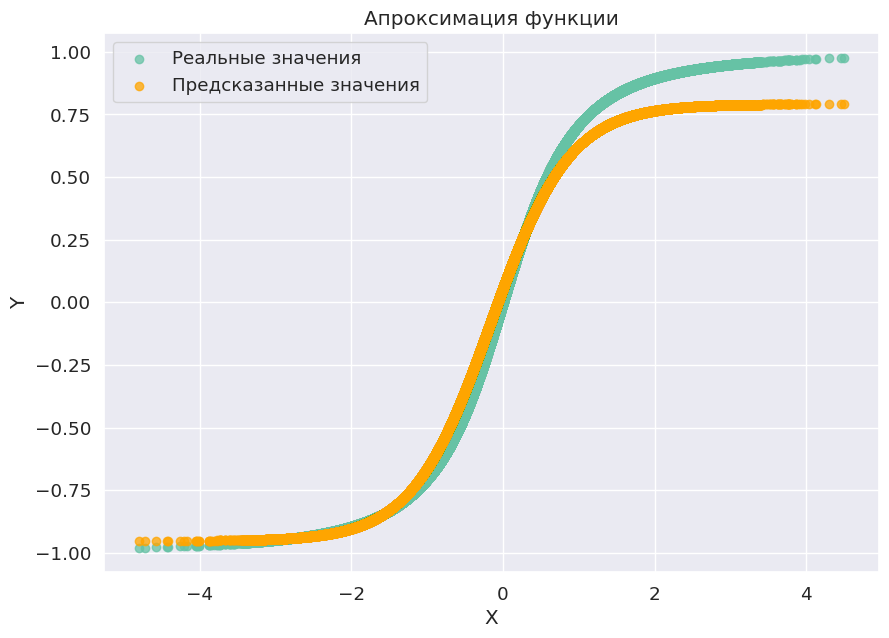

MSE = 0.005


In [ ]:
y_pred = model(X_test)
loss = optim_func(y_pred, y_test)
print(f"MSE = {loss:.3f}")
show_progress(X_test, y_test, y_pred, loss)

обучим нашу нейросеть по случайным батчам, параллельно выводя MSE после каждой из 1000 итераций

In [ ]:
my_model = MyNeuralNetwork()
my_model.fit(x_torch_test.numpy(), y_torch_test.numpy(), lr=0.4)

MSE after  99  iterations:  0.0003258875539453369
MSE after  199  iterations:  0.00011999398942154232
MSE after  299  iterations:  7.5720299838498e-05
MSE after  399  iterations:  6.436892162951403e-05
MSE after  499  iterations:  6.0987689730092665e-05
MSE after  599  iterations:  5.965520255182376e-05
MSE after  699  iterations:  5.9908366028140424e-05
MSE after  799  iterations:  6.103378398872664e-05
MSE after  899  iterations:  6.038027360005188e-05
MSE after  999  iterations:  5.975732945019646e-05


выведем предсказания всех моделей на один график и далее подсчитаем все среднеквадратичные ошибки и сделаем выводы:

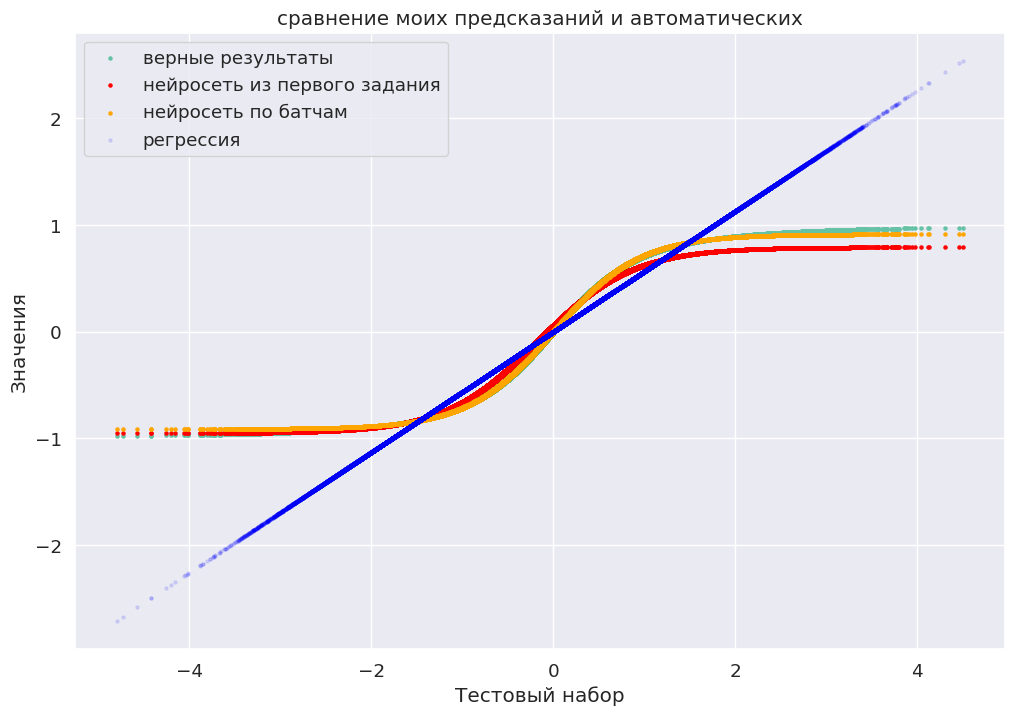

In [ ]:
with torch.no_grad():
    model_test_predictions = model(X_test)
    my_test_predictions = my_model.predict(X_test)
    linear_pred = linear_regression.predict(X_test)

plt.figure(figsize=(12, 8))

plt.scatter(X_test.numpy(), y_test.numpy(), label='верные результаты', s=5)
plt.scatter(X_test.numpy(), model_test_predictions.numpy(), color='red', label='нейросеть из первого задания', s=5)
plt.scatter(X_test.numpy(), my_test_predictions.numpy(), color='orange', label='нейросеть по батчам', s=5)
plt.scatter(X_test.numpy(), linear_pred, color='blue', label='регрессия', s=5, alpha=.1)


plt.xlabel('Тестовый набор')
plt.ylabel('Значения')
plt.title('сравнение моих предсказаний и автоматических')
plt.legend()

plt.show()

на графике видно, что модель из задачи 2 и модель по батчам справились очень хорошо и имеют отличный MSE, что не скажешь о модели линейной регрессии. Посчитаем все ошибки

In [ ]:
# Предсказания модели нейронной сети с обучением по батчам (MyNeuralNetwork)
my_test_predictions = my_model.predict(X_test)

# Рассчитываем MSE для модели нейронной сети с обучением по батчам (MyNeuralNetwork)
mse_my_model = mean_squared_error(y_test, my_test_predictions)
print("MSE модели нейронной сети с обучением по батчам (MyNeuralNetwork):", mse_my_model)


MSE модели нейронной сети с обучением по батчам (MyNeuralNetwork): 5.975732945019646e-05


In [ ]:
# Предсказания модели нейронной сети из задачи 2
with torch.no_grad():
    model_test_predictions = model(X_test)

# Рассчитываем MSE для модели нейронной сети из задачи 2
mse_model = mean_squared_error(y_test, model_test_predictions.numpy())
print("MSE модели нейронной сети из задачи 2:", mse_model)


MSE модели нейронной сети из задачи 2: 0.004988718


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем модель линейной регрессии
linear_regression = LinearRegression()

# Обучаем модель на обучающих данных
linear_regression.fit(X_train, y_train)

# Получаем предсказания модели на тестовых данных
linear_pred = linear_regression.predict(X_test)

# Рассчитываем MSE для модели линейной регрессии
mse_linear_regression = mean_squared_error(y_test, linear_pred)
print("MSE модели линейной регрессии:", mse_linear_regression)


MSE модели линейной регрессии: 0.025250988


предсказания очень точны, о чем говорит отклонение 0.000059 на модели по батчам. Сеть из задачи 2 имеет отклонение 0.005. Как видим, на этом графике действительные и предсказанные результаты значительно отличаются на конце -4. В предыдущем же задании в точке -4 графики почти совпадали, что не скажешь о точке 4. Можно сделать вывод, что неточности возникают в разных местах, но итог +- один. Модель линейной регрессии имеет ошибку 0.025 (ситуация аналогичная следующему пункту (там я аргументирую такой аномально низкий по сравнению с глазомером MSE))

Повторите вычисления для другой нелинейной функции $y(x)$.

Генерируем данные для второй функции \\
это будет просто парабола

In [ ]:
def build_graph(X):
  return (X**2)
sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
y = build_graph(X)
X = X.reshape(X.shape[0])
y = y.reshape(y.shape[0])

assert y.shape == (sample_size,)

снова генерируем тестовые и обучающие выборки и обучаем модели как и в прошлой задаче:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
X_train = torch.FloatTensor(X_train)
X_train = X_train.view(-1, 1)
X_test = torch.FloatTensor(X_test)
X_test = X_test.view(-1, 1)
y_train = torch.FloatTensor(y_train)
y_train = y_train.view(-1, 1)
y_test = torch.FloatTensor(y_test)
y_test = y_test.view(-1, 1)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optim_func = nn.MSELoss()

iter = 1000

for i in range(iter):
    y_pred = model(X_train)
    loss = optim_func(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (i + 1) % 100 == 0:
      print("Loss after ", i, "th iteration: ", loss.item())

Loss after  99 th iteration:  1.850190281867981
Loss after  199 th iteration:  1.615069031715393
Loss after  299 th iteration:  1.438126564025879
Loss after  399 th iteration:  1.334933876991272
Loss after  499 th iteration:  1.275862455368042
Loss after  599 th iteration:  1.2407653331756592
Loss after  699 th iteration:  1.2190073728561401
Loss after  799 th iteration:  1.2049980163574219
Loss after  899 th iteration:  1.1956820487976074
Loss after  999 th iteration:  1.189314603805542


обучаем модель линейной регрессии

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

покажем ошибку нашей модели линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем модель линейной регрессии
linear_regression = LinearRegression()

# Обучаем модель на обучающих данных
linear_regression.fit(X_train, y_train)

# Получаем предсказания модели на тестовых данных
linear_pred = linear_regression.predict(X_test)

# Рассчитываем MSE для модели линейной регрессии
mse_linear_regression = mean_squared_error(y_test, linear_pred)
print("MSE модели линейной регрессии:", mse_linear_regression)

MSE модели линейной регрессии: 1.8418345


обучаем модель по батчам

In [ ]:
my_model = MyNeuralNetwork()
my_model.fit(X_train.numpy(), y_train.numpy(), lr=0.2)

MSE after  99  iterations:  1.8407540091335717
MSE after  199  iterations:  1.8592455781127462
MSE after  299  iterations:  1.8415252020749213
MSE after  399  iterations:  1.8413597371974602
MSE after  499  iterations:  1.229079880550531
MSE after  599  iterations:  1.1224836710599204
MSE after  699  iterations:  1.1128250969429248
MSE after  799  iterations:  1.1136591881886557
MSE after  899  iterations:  1.1105111325427492
MSE after  999  iterations:  1.1111891663674913


обучим модель из второй задачи и визуализируем предсказания как во второй задаче:

MSE = 1.125


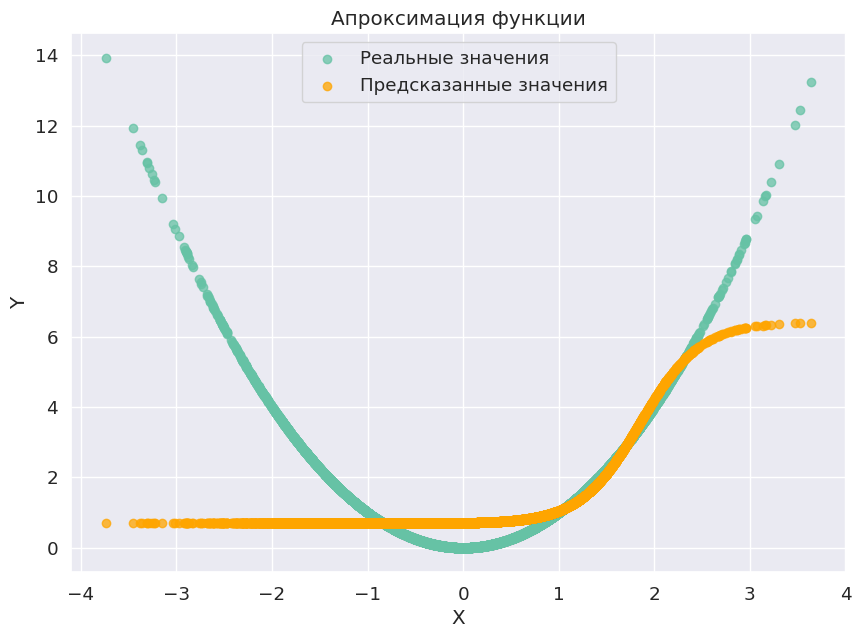

MSE = 1.125


In [ ]:
y_pred = model(X_test)
loss = optim_func(y_pred, y_test)
print(f"MSE = {loss:.3f}")
show_progress(X_test, y_test, y_pred, loss)

а теперь изобразим все модели на одном графике, посчитаем ошибки и сделаем выводы:

In [ ]:
with torch.no_grad():
    model_test_predictions = model(X_test)
    my_test_predictions = my_model.predict(X_test)
    linear_pred = linear_regression.predict(X_test)

plt.figure(figsize=(12, 8))

plt.scatter(X_test.numpy(), y_test.numpy(), label='верные результаты', s=5)
plt.scatter(X_test.numpy(), model_test_predictions.numpy(), color='red', label='нейросеть из первого задания', s=5)
plt.scatter(X_test.numpy(), my_test_predictions.numpy(), color='orange', label='нейросеть по батчам', s=5)
plt.scatter(X_test.numpy(), linear_pred, color='blue', label='регрессия', s=5, alpha=.1)


plt.xlabel('Тестовый набор')
plt.ylabel('Значения')
plt.title('сравнение моих предсказаний и автоматических')
plt.legend()

# Показать оба графика
plt.show()

на графике видно, что модель из задачи 2 и модель по батчам справились очень хорошо и имеют отличный MSE, что не скажешь о модели линейной регрессии. Посчитаем все ошибки

In [ ]:
# Предсказания модели нейронной сети с обучением по батчам (MyNeuralNetwork)
my_test_predictions = my_model.predict(X_test)

# Рассчитываем MSE для модели нейронной сети с обучением по батчам (MyNeuralNetwork)
mse_my_model = mean_squared_error(y_test, my_test_predictions)
print("MSE модели нейронной сети с обучением по батчам (MyNeuralNetwork):", mse_my_model)


MSE модели нейронной сети с обучением по батчам (MyNeuralNetwork): 1.1111891663674913


In [ ]:
# Предсказания модели нейронной сети из задачи 2
with torch.no_grad():
    model_test_predictions = model(X_test)

# Рассчитываем MSE для модели нейронной сети из задачи 2
mse_model = mean_squared_error(y_test, model_test_predictions.numpy())
print("MSE модели нейронной сети из задачи 2:", mse_model)


MSE модели нейронной сети из задачи 2: 1.1251111


могло бы показаться, что МsЕ необосновано мало, ведь справа от графика сигмоида предсказаний вообще не лежит на параболе. Но распределение нормальное, то есть все точки в центре +-. Поэтому и разброс значений невелик

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем модель линейной регрессии
linear_regression = LinearRegression()

# Обучаем модель на обучающих данных
linear_regression.fit(X_train, y_train)

# Получаем предсказания модели на тестовых данных
linear_pred = linear_regression.predict(X_test)

# Рассчитываем MSE для модели линейной регрессии
mse_linear_regression = mean_squared_error(y_test, linear_pred)
print("MSE модели линейной регрессии:", mse_linear_regression)


MSE модели линейной регрессии: 1.8418345


результаты оказались не слишком точными. Прокомментировать это я могу тем, что парабола и сигмоида имеют различное строение и даже вручную достаточно тяжело приблизить первую второй. Но с другой стороны значение MSE 1.11 это очень хороший результат для самодельной нейронной сети. Лучший результат снова у нейронки по батчам: 1.11 ошибка (у нейронной сети из 2 задачи 1.13, а у линейной регрессии вообще 1.8). Как я и аргументировал раньше, MSE у моделей оказывается меньше предполагаемого, т.к. используем мы номральное распределение, имеющее скачок в середине.

**Вывод:**
Напонмю, что начал я работать с сигмоидами потому что решил, что нейросети реально работают хорошо и захотел выжать из них максимум. Я это сделал. В задаче 3 я разобрал два случая: сигмоида и простой график - парабола. На параболе на тестовой выборке MSE вышла 1.11 для модели по батчам и 1.13 для модели второго задания. В первом пункте (случай сигмоиды) батчевая модель тоже оказалась намного лучше (0.00006 против 0.0049). Таким образом, можно сделать вывод о том, что модель, обучающаяся по случайным батчам, работает намного лучше. Также хочется подчеркнуть, что я не рассматриваю случай повторяющихся элементов в батчах, так как на лекции было прямым текстом сказано, что элементы в батче могут совпадать (мы рандомим индексы и не задумываемся по поводу их совпадения друг с другом)